# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
weather_report = pd.DataFrame(columns = ["City", "Cloudiness", "Country", "Date", "Humidity",
                                        "Lat", "Lng", "Max Temp", "Wind Speed"])
weather_report["City"] = cities
weather_report.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint george,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ancud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nassau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,georgetown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
based_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#t0 = time.time()
count = 1
set_count = 1
print(f"Beginning Data Retrieval\n..........................................")

for index, row in weather_report.iterrows():
    try:
        print(f"Processing Record \033[34m {count}\033[0m of Set \033[34m {set_count}\033[0m | {row['City']}")
        count = count + 1
        city_search = row["City"]
        url = f'{based_url}appid={api_key}&q={city_search}&units={units}'
        weather_response = requests.get(url)
        weather_json = weather_response.json()
        weather_report.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
        weather_report.loc[index, "Country"] = weather_json["sys"]["country"]
        weather_report.loc[index, "Date"] = weather_json["dt"]   
        weather_report.loc[index, "Humidity"] = weather_json["main"]["humidity"]  
        weather_report.loc[index, "Max Temp"] = weather_json["main"]["temp_max"]
        weather_report.loc[index, "Lat"] = weather_json["coord"]["lat"]
        weather_report.loc[index, "Lng"] = weather_json["coord"]["lon"]
        weather_report.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
    except (KeyError, IndexError):
        print("City " + "\033[1m" + "not"+ "\033[0m"+ " found. Skipping.....")
    if count == 51:
        #t1 = time.time()
        count = 1
        set_count = set_count + 1
        time.sleep(1)
        #time.sleep(60-(t1-t0))
        #t0=time.time()
        
        
    
          
    
    

Beginning Data Retrieval
..........................................
Processing Record  1 of Set  1 | saint george
Processing Record  2 of Set  1 | taolanaro
City not found. Skipping.....
Processing Record  3 of Set  1 | ancud
Processing Record  4 of Set  1 | nassau
Processing Record  5 of Set  1 | georgetown
Processing Record  6 of Set  1 | qaanaaq
Processing Record  7 of Set  1 | lompoc
Processing Record  8 of Set  1 | atuona
Processing Record  9 of Set  1 | arraial do cabo
Processing Record  10 of Set  1 | castro
Processing Record  11 of Set  1 | requena
Processing Record  12 of Set  1 | punta arenas
Processing Record  13 of Set  1 | ushuaia
Processing Record  14 of Set  1 | sorland
Processing Record  15 of Set  1 | muli
Processing Record  16 of Set  1 | carnarvon
Processing Record  17 of Set  1 | ahipara
Processing Record  18 of Set  1 | yellowknife
Processing Record  19 of Set  1 | nikolskoye
Processing Record  20 of Set  1 | zabaykalsk
Processing Record  21 of Set  1 | albany
Proc

Processing Record  26 of Set  3 | talcahuano
Processing Record  27 of Set  3 | jabiru
City not found. Skipping.....
Processing Record  28 of Set  3 | galgani
City not found. Skipping.....
Processing Record  29 of Set  3 | tucumcari
Processing Record  30 of Set  3 | mwinilunga
Processing Record  31 of Set  3 | viligili
City not found. Skipping.....
Processing Record  32 of Set  3 | jiangyou
Processing Record  33 of Set  3 | balykshi
City not found. Skipping.....
Processing Record  34 of Set  3 | cottonwood
Processing Record  35 of Set  3 | san patricio
Processing Record  36 of Set  3 | eldikan
City not found. Skipping.....
Processing Record  37 of Set  3 | saint-louis
Processing Record  38 of Set  3 | jibuti
City not found. Skipping.....
Processing Record  39 of Set  3 | vetlanda
Processing Record  40 of Set  3 | olafsvik
City not found. Skipping.....
Processing Record  41 of Set  3 | tasiilaq
Processing Record  42 of Set  3 | severo-kurilsk
Processing Record  43 of Set  3 | codrington


City not found. Skipping.....
Processing Record  50 of Set  5 | ugoofaaru
Processing Record  1 of Set  6 | larsnes
Processing Record  2 of Set  6 | derzhavinsk
Processing Record  3 of Set  6 | sorong
Processing Record  4 of Set  6 | fairbanks
Processing Record  5 of Set  6 | hohhot
Processing Record  6 of Set  6 | ostrovnoy
Processing Record  7 of Set  6 | katobu
Processing Record  8 of Set  6 | longyearbyen
Processing Record  9 of Set  6 | talnakh
Processing Record  10 of Set  6 | gasa
Processing Record  11 of Set  6 | buala
Processing Record  12 of Set  6 | warrington
Processing Record  13 of Set  6 | saint-francois
Processing Record  14 of Set  6 | constitucion
Processing Record  15 of Set  6 | omboue
Processing Record  16 of Set  6 | macaubas
Processing Record  17 of Set  6 | beringovskiy
Processing Record  18 of Set  6 | el badari
City not found. Skipping.....
Processing Record  19 of Set  6 | aleksandrovskoye
Processing Record  20 of Set  6 | baykit
Processing Record  21 of Set  

Processing Record  27 of Set  8 | isla mujeres
Processing Record  28 of Set  8 | progreso
Processing Record  29 of Set  8 | arak
Processing Record  30 of Set  8 | jagraon
Processing Record  31 of Set  8 | fortuna foothills
Processing Record  32 of Set  8 | dortyol
Processing Record  33 of Set  8 | mahebourg
Processing Record  34 of Set  8 | longlac
City not found. Skipping.....
Processing Record  35 of Set  8 | vardo
Processing Record  36 of Set  8 | kamen-rybolov
Processing Record  37 of Set  8 | rio gallegos
Processing Record  38 of Set  8 | sentyabrskiy
City not found. Skipping.....
Processing Record  39 of Set  8 | norman wells
Processing Record  40 of Set  8 | meyungs
City not found. Skipping.....
Processing Record  41 of Set  8 | nenjiang
Processing Record  42 of Set  8 | alice springs
Processing Record  43 of Set  8 | bambanglipuro
Processing Record  44 of Set  8 | shitanjing
Processing Record  45 of Set  8 | husavik
Processing Record  46 of Set  8 | asyut
Processing Record  47 

Processing Record  1 of Set  11 | satitoa
City not found. Skipping.....
Processing Record  2 of Set  11 | prince rupert
Processing Record  3 of Set  11 | asau
City not found. Skipping.....
Processing Record  4 of Set  11 | palabuhanratu
City not found. Skipping.....
Processing Record  5 of Set  11 | skarnes
Processing Record  6 of Set  11 | xuanhua
Processing Record  7 of Set  11 | los cordobas
Processing Record  8 of Set  11 | araouane
Processing Record  9 of Set  11 | aguililla
Processing Record  10 of Set  11 | jurm
Processing Record  11 of Set  11 | urusha
Processing Record  12 of Set  11 | odienne
Processing Record  13 of Set  11 | sorsk
Processing Record  14 of Set  11 | salalah
Processing Record  15 of Set  11 | songea
Processing Record  16 of Set  11 | takahashi
Processing Record  17 of Set  11 | evensk
Processing Record  18 of Set  11 | fortuna
Processing Record  19 of Set  11 | ngukurr
City not found. Skipping.....
Processing Record  20 of Set  11 | nelson bay
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_report.to_csv(output_data_file)
weather_report.count()

City          616
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [6]:
weather_report.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saint george,0,GR,1562034588,72,39.45,22.34,75,0.69
1,taolanaro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ancud,20,CL,1562033863,100,-41.87,-73.83,35.6,2.24
3,nassau,0,AT,1562034588,82,46.81,15.34,69.01,1.12
4,georgetown,40,GY,1562034453,94,6.8,-58.16,77,2.24


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

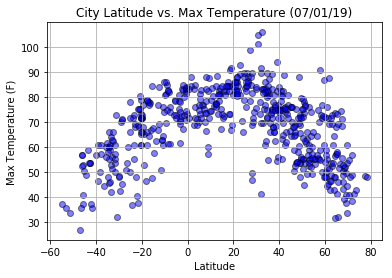

In [7]:
plt.scatter(weather_report["Lat"], weather_report["Max Temp"], marker = "o", facecolors = "blue",
           edgecolors = "black", alpha = 0.5)
plt.title(f'City Latitude vs. Max Temperature ({datetime.now().date().strftime("%m/%d/%y")})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs_Max_Temperature")
plt.show()

#### Latitude vs. Humidity Plot

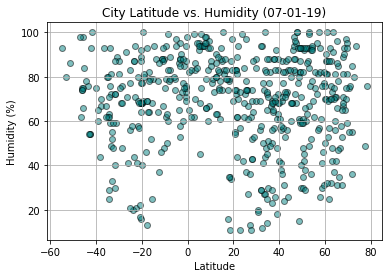

In [8]:
plt.scatter(weather_report["Lat"], weather_report["Humidity"], marker = "o", facecolors = "teal",
           edgecolors = "black", alpha = 0.5)
plt.title(f'City Latitude vs. Humidity ({datetime.now().date().strftime("%m-%d-%y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs_Humidity")
plt.show()

#### Latitude vs. Cloudiness Plot

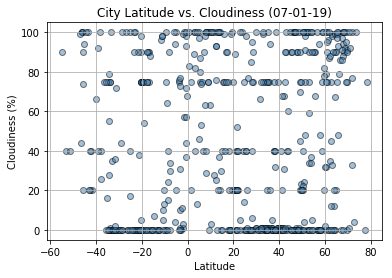

In [9]:
plt.scatter(weather_report["Lat"], weather_report["Cloudiness"], marker = "o", facecolors = "steelblue",
           edgecolors = "black", alpha = 0.5)
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date().strftime("%m-%d-%y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs_Cloudiness")
plt.show()

#### Latitude vs. Wind Speed Plot

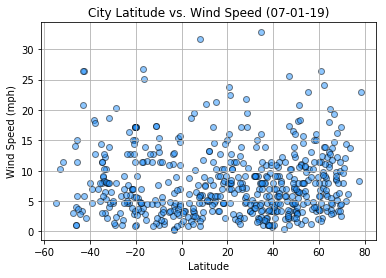

In [10]:
plt.scatter(weather_report["Lat"], weather_report["Wind Speed"], marker = "o", facecolors = "dodgerblue",
           edgecolors = "black", alpha = 0.5)
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date().strftime("%m-%d-%y")})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("../output_data/City_Latitude_vs_Wind_Speed")
plt.show()